# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [2]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [3]:
# 2) seu código aqui
def itens_faltates(df: pd.DataFrame) -> None:
    qtde_var = 0
    for col in df.columns:
        soma_faltante = 0
        soma_faltante = sum(df[col].isna())
        if soma_faltante > 0:
            qtde_var += 1
            print(f'Coluna {col} possui {soma_faltante} valores faltantes.')
    print(f'Esse DataFrame possui {qtde_var} variáveis com itens faltantes.')
    return None

In [4]:
itens_faltates(sinasc)

Coluna CODESTAB possui 115 valores faltantes.
Coluna ESTCIVMAE possui 317 valores faltantes.
Coluna ESCMAE possui 312 valores faltantes.
Coluna CODOCUPMAE possui 2907 valores faltantes.
Coluna QTDFILVIVO possui 1573 valores faltantes.
Coluna QTDFILMORT possui 2098 valores faltantes.
Coluna GESTACAO possui 1232 valores faltantes.
Coluna GRAVIDEZ possui 79 valores faltantes.
Coluna PARTO possui 49 valores faltantes.
Coluna HORANASC possui 21 valores faltantes.
Coluna SEXO possui 4 valores faltantes.
Coluna APGAR1 possui 96 valores faltantes.
Coluna APGAR5 possui 103 valores faltantes.
Coluna RACACOR possui 647 valores faltantes.
Coluna IDANOMAL possui 591 valores faltantes.
Coluna CODANOMAL possui 26814 valores faltantes.
Coluna DTRECORIGA possui 27028 valores faltantes.
Coluna NATURALMAE possui 298 valores faltantes.
Coluna CODMUNNATU possui 298 valores faltantes.
Coluna CODUFNATU possui 298 valores faltantes.
Coluna ESCMAE2010 possui 249 valores faltantes.
Coluna SERIESCMAE possui 1271

In [5]:
# 3) seu código aqui
sinasc = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']] 
itens_faltates(sinasc)

Coluna ESTCIVMAE possui 317 valores faltantes.
Coluna ESCMAE possui 312 valores faltantes.
Coluna QTDFILVIVO possui 1573 valores faltantes.
Coluna GESTACAO possui 1232 valores faltantes.
Coluna GRAVIDEZ possui 79 valores faltantes.
Coluna APGAR5 possui 103 valores faltantes.
Esse DataFrame possui 6 variáveis com itens faltantes.


In [6]:
# 4) seu código aqui
sinasc.dropna(subset=['APGAR5'],inplace=True)
sinasc.shape[0]

26925

In [7]:
# 5) seu código aqui
sinasc['CONSULTAS'].fillna(9,inplace = True)
sinasc['ESTCIVMAE'].fillna(9, inplace = True)

sinasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 27027
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCNASC     26925 non-null  int64  
 1   IDADEMAE    26925 non-null  int64  
 2   ESTCIVMAE   26925 non-null  float64
 3   ESCMAE      26615 non-null  object 
 4   QTDFILVIVO  25359 non-null  float64
 5   GESTACAO    25709 non-null  object 
 6   GRAVIDEZ    26849 non-null  object 
 7   CONSULTAS   26925 non-null  int64  
 8   APGAR5      26925 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ MB


In [8]:
# 6) Seu código aqui
sinasc['QTDFILVIVO'].fillna(0, inplace = True)
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 27027
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCNASC     26925 non-null  int64  
 1   IDADEMAE    26925 non-null  int64  
 2   ESTCIVMAE   26925 non-null  float64
 3   ESCMAE      26615 non-null  object 
 4   QTDFILVIVO  26925 non-null  float64
 5   GESTACAO    25709 non-null  object 
 6   GRAVIDEZ    26849 non-null  object 
 7   CONSULTAS   26925 non-null  int64  
 8   APGAR5      26925 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ MB


In [9]:
# 7) seu código aqui
sinasc['ESCMAE'].fillna('Ignorado', inplace = True)
sinasc['GRAVIDEZ'].fillna('Ignorado', inplace = True)
sinasc['GESTACAO'].fillna('Ignorado', inplace = True)
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 27027
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCNASC     26925 non-null  int64  
 1   IDADEMAE    26925 non-null  int64  
 2   ESTCIVMAE   26925 non-null  float64
 3   ESCMAE      26925 non-null  object 
 4   QTDFILVIVO  26925 non-null  float64
 5   GESTACAO    26925 non-null  object 
 6   GRAVIDEZ    26925 non-null  object 
 7   CONSULTAS   26925 non-null  int64  
 8   APGAR5      26925 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ MB


In [10]:
itens_faltates(sinasc)

Esse DataFrame possui 0 variáveis com itens faltantes.


In [11]:
# 8) seu código aqui
sinasc['APGAR5'].unique()
sinasc['APGAR5_DESC'] = None
sinasc.loc[sinasc['APGAR5'] >= 8,'APGAR5_DESC'] =  'normal'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] < 8),'APGAR5_DESC'] =  'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] < 6),'APGAR5_DESC'] =  'asfixia moderada'
sinasc.loc[sinasc['APGAR5'] < 4,'APGAR5_DESC'] =  'asfixia severa'

In [12]:
sinasc.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,APGAR5_DESC
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal


In [13]:
sinasc['APGAR5_DESC'].value_counts()

normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: APGAR5_DESC, dtype: int64

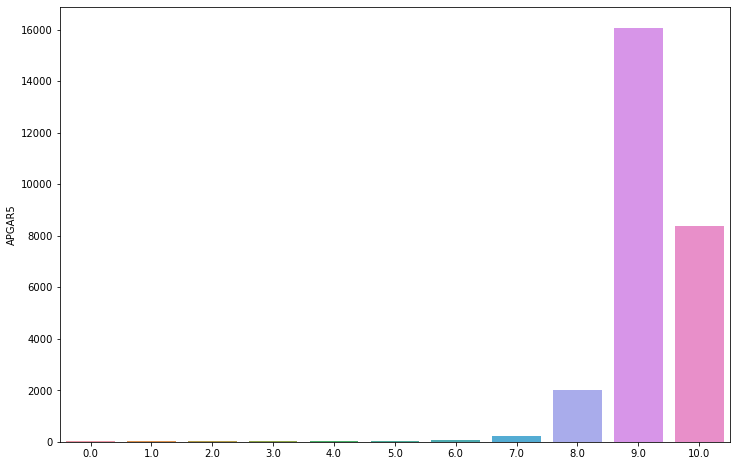

In [14]:
plt.rcParams['figure.figsize'] = [12,8]
ax = sns.barplot(x=sinasc['APGAR5'].value_counts().index,y=sinasc['APGAR5'].value_counts())
plt.show()

In [24]:
# 9) seu código aqui
for col in sinasc.columns:
    if sinasc[col].dtypes == 'O':
        sinasc[col]=sinasc[col].replace(regex=r' ',value ='_').str.lower()

In [25]:
sinasc['ESCMAE']

0            8_a_11_anos
1            8_a_11_anos
2            8_a_11_anos
3        12_anos_ou_mais
4            8_a_11_anos
              ...       
27023    12_anos_ou_mais
27024        8_a_11_anos
27025        8_a_11_anos
27026        8_a_11_anos
27027        8_a_11_anos
Name: ESCMAE, Length: 26925, dtype: object